In [102]:
# Gerekli olacak veya olabilecek tüm kütüphaneleri import edelim.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [103]:
# Şimdi ise Kaggle'dan aldığımız veri setini ekleyelim.
insurance = pd.read_csv("insurance.csv")

# Ana veriye istediğimiz zaman ulaşabilmek ve kullanabilmek adına, veri setinin bir kopyasını hazırlayalım.
df = insurance.copy()

#Veri setini çağıralım.
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [104]:
#Veri hakkında incelemeler yapalım. İlk beş veriye satırına bakalım.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [105]:
# Son beş veri satırına bakalım.
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [106]:
# Hem boş eleman var mı kontrol edelim, hem de doğru data tiplerindeler mi ona bakalım.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [107]:
#Boş eleman kalmadığından emin olalım.
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [108]:
#Mantıksız ve tutarsız istatistik verileri olup olmadığına bakalım.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [109]:
#Linear Regresyon yapabilmek için tüm verilerin sayısal olması gerektiğini biliyoruz.
#Kategorik olan cinsiyet, bölge ve sigara içme durumu gibi durumları sayısal hale getirmeliyiz.
#Bu yüzden de Label Encoding tekniğini kullanacağız.
from sklearn.preprocessing import LabelEncoder
DataFrame =  df
label_encoder = LabelEncoder()

df['encoded_sex'] = label_encoder.fit_transform(df['sex'])
df['encoded_smoker'] = label_encoder.fit_transform(df['smoker'])
df['encoded_region'] = label_encoder.fit_transform(df['region'])

df = df.drop(columns=['sex', 'smoker', 'region'])

df



,age,bmi,children,charges,encoded_sex,encoded_smoker,encoded_region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


In [110]:
#Her şeyi hızlıca tekrar kontrol edelim.
df.isna().sum()

age               0
bmi               0
children          0
charges           0
encoded_sex       0
encoded_smoker    0
encoded_region    0
dtype: int64

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
encoded_sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
encoded_smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
encoded_region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000


In [112]:
#Linear regresyon ve eğitim için gerekli verileri çağıralım.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [113]:
y = df['charges']
X = df.drop(columns=['charges'])

# Veriyi eğitim ve test kümelerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression modelini oluşturalım
model = LinearRegression()

# Modeli eğitelim
model.fit(X_train, y_train)

# Eğitilmiş modeli kullanarak tahminler yapalım
y_pred = model.predict(X_test)

#Şimdi score ve katsayıları görelim.
print(f"Score: {model.score(X,y)}")
print(f"Coefficents: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Score: 0.7505814601607412
Coefficents: [ 2.57056264e+02  3.35781491e+02  4.25091456e+02 -1.87914567e+01
  2.36478181e+04 -2.71284266e+02]
Intercept: -11946.606567263038


In [114]:
#Score'u daha da arttırabilir miyiz? Gerekli metrikleri kullanarak bir daha deneyelim.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 33635210.43117841
Mean Absolute Error: 4186.5088983664355
R2 Score: 0.7833463107364538


In [115]:
#Regülerizasyon yapabilmek için Lasso hipermetriğini deneyelim.
from sklearn.linear_model import Lasso
alpha_value = 0.1
lasso_model = Lasso(alpha=alpha_value)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (Lasso):", mse)
print("R2 Score:", r2)
print(f"Score: {lasso_model.score(X,y)}")

Mean Squared Error (Lasso): 33635621.74785178
R2 Score: 0.783343661332047
Score: 0.7505808972796749


In [116]:
#Daha ileri gidip R2 Score ya da Score'u arttırmak istersek veriyi tekrardan düzenlememiz, daha iyi bir eğitim modeline geçmemiz gerekebilir.
#Ya da feature'lar arasındaki korelasyonları tespit edip, durumuna göre bazı feature'ları silmemiz gerekebilir.
# Ancak şimdilik 0.75 fena olmayan bir oran. Standart Scaler da deneyelim son kez.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Linear Regression modelini oluşturalım
model = LinearRegression()

# Modeli eğitelim
model.fit(X_scaled_train, y_train)

# Eğitilmiş modeli kullanarak tahminler yapalım
y_pred = model.predict(X_scaled_test)

model.fit(X_scaled_train, y_train)

y_pred = model.predict(X_scaled_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("R2 Score:", r2)
print(f"Score: {model.score(X_scaled,y)}")


Mean Squared Error : 33635210.43117844
R2 Score: 0.7833463107364536
Score: 0.7505814601607412


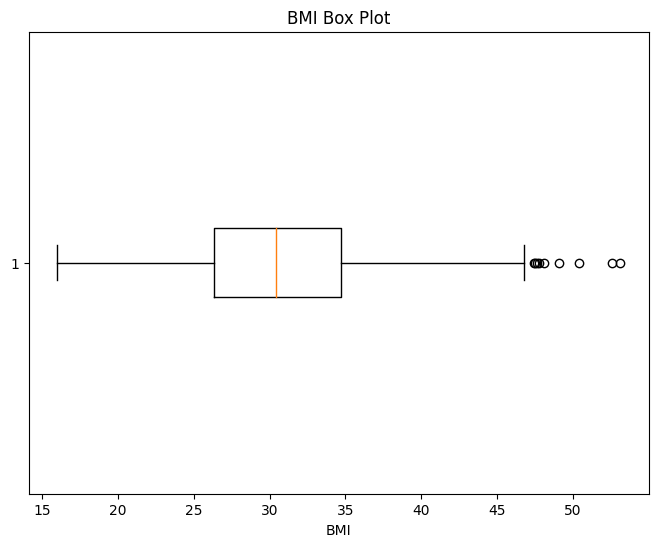

In [117]:
#Belirli sonuçlar bulduğumuza göre, şimdi de projede istendiği üzere görsel olarak belirli featurelar arasındaki ilişkiyi inceleyelim.
#BMI'ın dağılımını inceleyelim.
plt.figure(figsize=(8, 6))
plt.boxplot(df['bmi'], vert=False)  # vert=False yatay bir box plot oluşturur
plt.title('BMI Box Plot')
plt.xlabel('BMI')
plt.show()

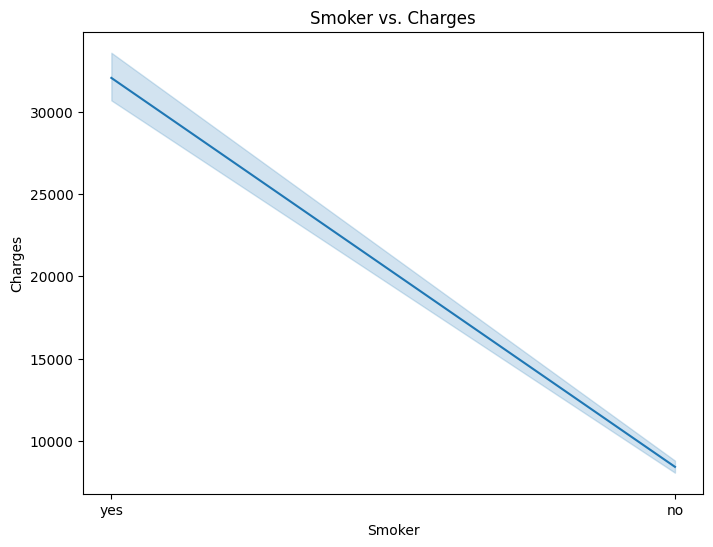

In [118]:
#Epey bir outlier gördük gibi. Şimdi ise Sigara içilmesi ile hastane masrafı arasındaki ilişkiyi gözlemleyelim.
plt.figure(figsize=(8, 6))
sns.lineplot(x='smoker', y='charges', data=insurance)
plt.title('Smoker vs. Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

In [119]:
#Sigara içilmesi azalınca hastane masrafının da azaldığı gözlemleniyor.
#Aynı mantıkla sigara içilmesi ile bölge arasındaki ilişkisi, ardından sırasıyla; bmi ile cinsiyetin ilişkisi,yaş ile bmi'ın ilişkisi
#bmi ile çocuk sayısının, bmi ile hastane masrafının ve son olarak bölge,sigara içme durumu ve bmi arasındaki ilişkiyi gözlemleyelim.
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


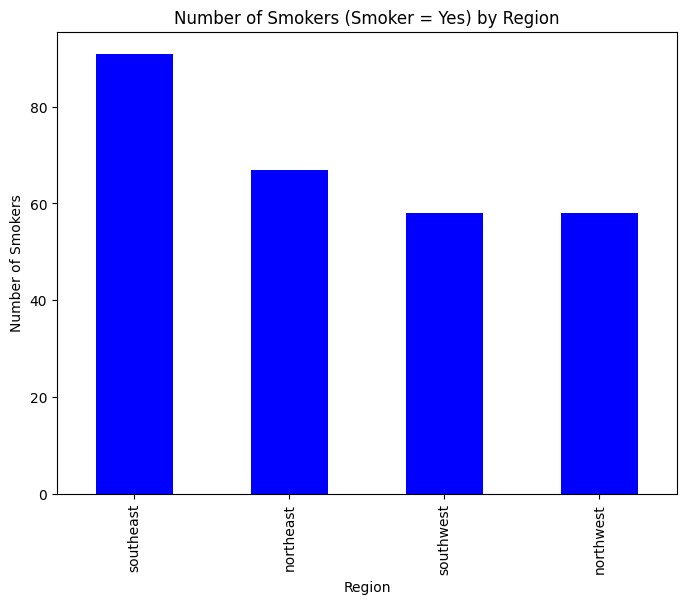

In [124]:
smoker_yes = insurance[insurance['smoker'] == 'yes']
region_counts = smoker_yes['region'].value_counts()

plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='blue')
plt.title('Number of Smokers (Smoker = Yes) by Region')
plt.xlabel('Region')
plt.ylabel('Number of Smokers')
plt.show()


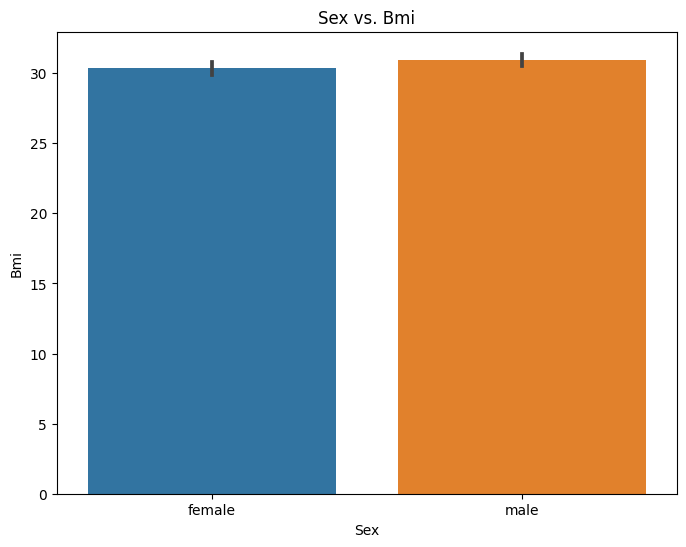

In [135]:
#Sigara içiminin bölgeye göre farklılık gösterdiğini görebiliyoruz. En çok Güneydoğu bölgesinde sigara içiliyor veriye göre.
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='bmi', data=insurance)
plt.title('Sex vs. Bmi')
plt.xlabel('Sex')
plt.ylabel('Bmi')
plt.show()

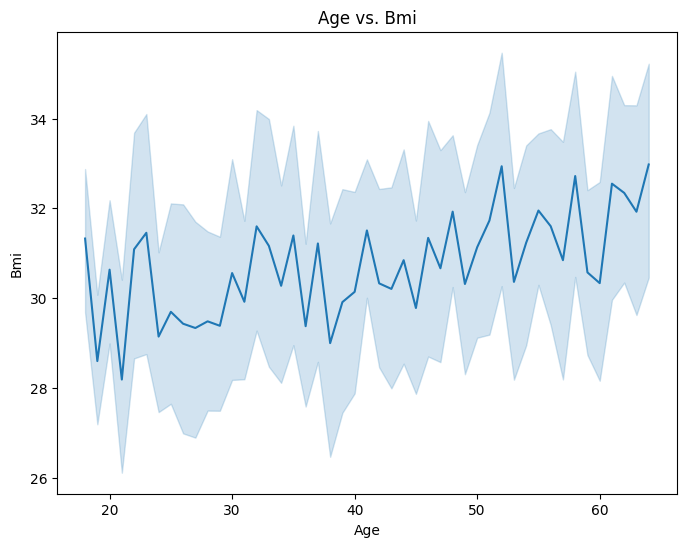

In [136]:
#Erkeklerde Bmi'ın daha yüksek olma eğiliminde olduğunu gördük
plt.figure(figsize=(8, 6))
sns.lineplot(x='age', y='bmi', data=insurance)
plt.title('Age vs. Bmi')
plt.xlabel('Age')
plt.ylabel('Bmi')
plt.show()

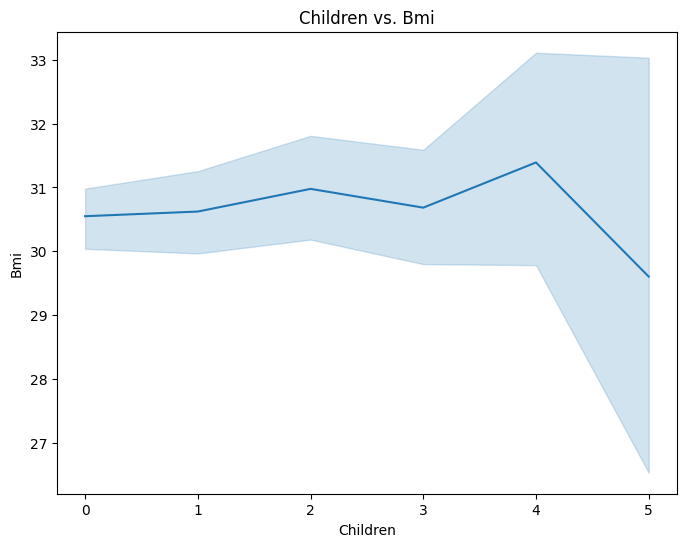

In [139]:
#Yaş arttıkça genel olarak Bmi artma eğilimi olsa da çok büyük bir artış olmamakla beraber linear bir artış gözlemlenmez. Trend artış yönünde.
plt.figure(figsize=(8, 6))
sns.lineplot(x='children', y='bmi', data=insurance)
plt.title('Children vs. Bmi')
plt.xlabel('Children')
plt.ylabel('Bmi')
plt.show()

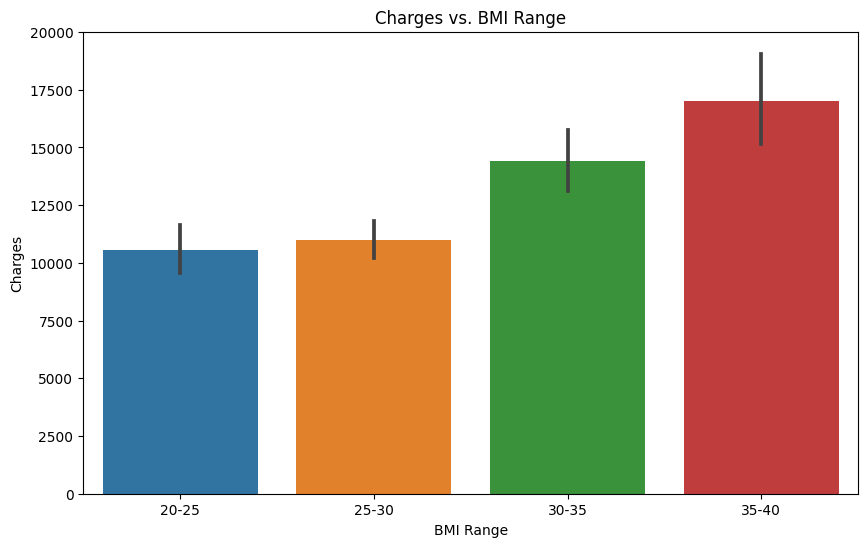

In [142]:
#Dört çocuğa kadar genel olarak artış gözlemlense de dördüncü çocuktan sonra Bmi aniden düşme eğiliminde.
bins = [20, 25, 30, 35, 40]
labels = ['20-25', '25-30', '30-35', '35-40']
insurance['bmi_range'] = pd.cut(insurance['bmi'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.barplot(x='bmi_range', y='charges', data=insurance)
plt.title('Charges vs. BMI Range')
plt.xlabel('BMI Range')
plt.ylabel('Charges')
plt.show()


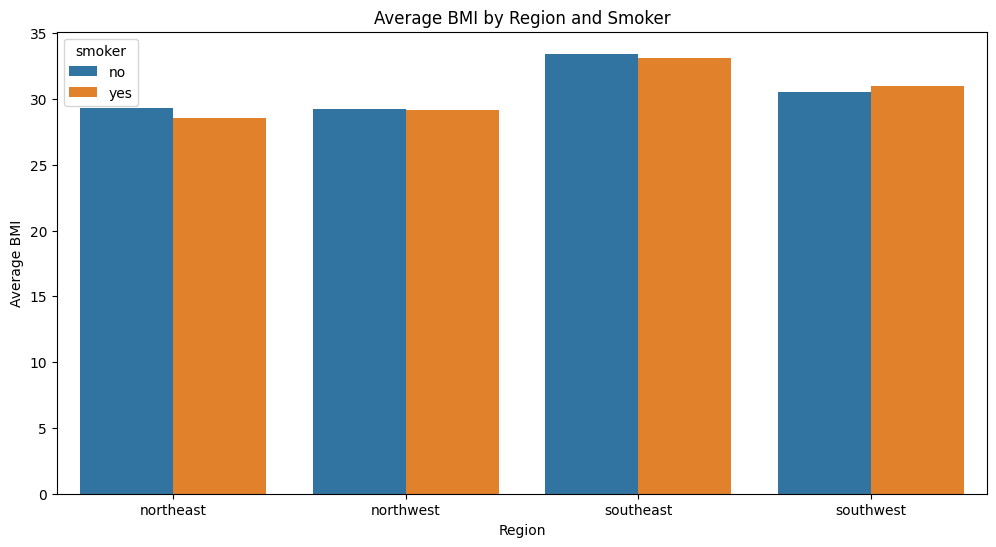

In [147]:
#Bmi arttıkça hastane masrafı da artma eğiliminde.
grouped_data = insurance.groupby(['region', 'smoker'])['bmi'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='bmi', hue='smoker', data=grouped_data)
plt.title('Average BMI by Region and Smoker')
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.show()

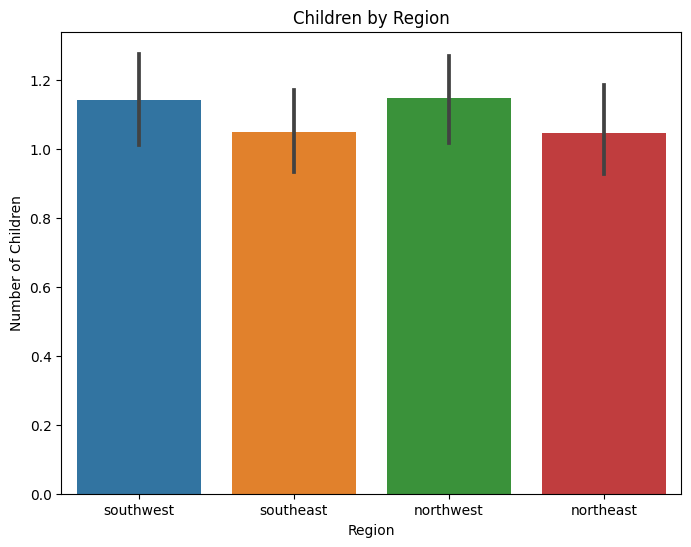

In [149]:
#En çok çocuk sigortası olan bölgeyi bulalım.
plt.figure(figsize=(8, 6))
sns.barplot(x='region', y='children', data=insurance)
plt.title('Children by Region')
plt.xlabel('Region')
plt.ylabel('Number of Children')
plt.show()

In [ ]:
#En çok Kuzeybatı'da çocuk olduğunu görürüz.